In [16]:
import numpy as np
import random
import math

# Problem parameters
num_persons = 24
num_rows = 4
num_cols = 6
num_seats = num_rows * num_cols
# Number of conflicts to generate conflicts
Nu_of_conflicts = 40 



In [17]:
# Fix the random seed for generating pairwise_conflicts matrix
np.random.seed(20)

# Initialize a pairwise conflicts matrix with zeros
pairwise_conflicts = np.zeros((24, 24), dtype=int)

# Generate the pairwise conflicts
for _ in range(Nu_of_conflicts):
    i, j = np.random.randint(0, 24, size=2)
    while i == j or pairwise_conflicts[i, j] == 1:
        i, j = np.random.randint(0, 24, size=2)
    pairwise_conflicts[i, j] = 1
    pairwise_conflicts[j, i] = 1

# Count the total number of conflicts
total_conflicts = pairwise_conflicts.sum() 
print("Total number of conflicts:", total_conflicts)

# Function to print conflicts
def print_conflicts(conflicts_matrix):
    for i in range(conflicts_matrix.shape[0]):
        for j in range(i + 1, conflicts_matrix.shape[1]):  # Ensure each conflict is only printed once
            if conflicts_matrix[i, j] == 1:
                print(f"Conflict between person {i} and person {j}")

print_conflicts(pairwise_conflicts)

Total number of conflicts: 80
Conflict between person 0 and person 14
Conflict between person 0 and person 22
Conflict between person 1 and person 10
Conflict between person 1 and person 18
Conflict between person 2 and person 5
Conflict between person 2 and person 7
Conflict between person 3 and person 11
Conflict between person 3 and person 15
Conflict between person 3 and person 18
Conflict between person 4 and person 14
Conflict between person 4 and person 20
Conflict between person 5 and person 7
Conflict between person 6 and person 9
Conflict between person 6 and person 11
Conflict between person 6 and person 13
Conflict between person 6 and person 14
Conflict between person 6 and person 15
Conflict between person 7 and person 11
Conflict between person 8 and person 11
Conflict between person 8 and person 17
Conflict between person 8 and person 21
Conflict between person 8 and person 22
Conflict between person 9 and person 16
Conflict between person 9 and person 20
Conflict betwe

In [18]:
def custom_loss(seating, pairwise_conflicts, seat_rows=4, seat_cols=6):
    """
    Custom loss function to evaluate the seating arrangement.

    Args:
    - seating (np.ndarray): Seating arrangement of shape (seat_rows, seat_cols).
                            Each element represents the person assigned to that seat.
    - seat_rows (int): Number of rows in the seating arrangement.
    - seat_cols (int): Number of columns in the seating arrangement.


    Returns:
    - float: Calculated loss based on seat assignment constraints and conflicts.
    """

    # Initialize conflict loss
    conflict_loss = 0

    # Iterate over each seat in the seating arrangement
    for i in range(seat_rows):
        for j in range(seat_cols):
            person = seating[i, j]
            if person == -1:
                continue
            # Check for conflicts with neighboring seats
            if i > 0:  # Up
                neighbor_up = seating[i - 1, j]
                if neighbor_up != -1:
                    conflict_loss += pairwise_conflicts[person, neighbor_up]
            if i < seat_rows - 1:  # Down
                neighbor_down = seating[i + 1, j]
                if neighbor_down != -1:
                    conflict_loss += pairwise_conflicts[person, neighbor_down]
            if j > 0:  # Left
                neighbor_left = seating[i, j - 1]
                if neighbor_left != -1:
                    conflict_loss += pairwise_conflicts[person, neighbor_left]
            if j < seat_cols - 1:  # Right
                neighbor_right = seating[i, j + 1]
                if neighbor_right != -1:
                    conflict_loss += pairwise_conflicts[person, neighbor_right]

    # Combine all the losses
    total_loss = conflict_loss

    return total_loss


In [19]:
# Simulated Annealing Algorithm
def simulated_annealing(initial_seating, pairwise_conflicts, max_iterations=50000, initial_temp=100.0, cooling_rate=0.99):
    current_seating = initial_seating.copy()
    current_loss = custom_loss(current_seating, pairwise_conflicts)
    best_seating = current_seating.copy()
    best_loss = current_loss
    temp = initial_temp

    for iteration in range(max_iterations):
        # Generate a neighboring solution by swapping two seats
        new_seating = current_seating.copy()
        i1, j1 = random.randint(0, num_rows - 1), random.randint(0, num_cols - 1)
        i2, j2 = random.randint(0, num_rows - 1), random.randint(0, num_cols - 1)
        new_seating[i1, j1], new_seating[i2, j2] = new_seating[i2, j2], new_seating[i1, j1]
        
        new_loss = custom_loss(new_seating, pairwise_conflicts)
        
        # Accept the new solution with a probability
        if new_loss < current_loss or random.uniform(0, 1) < math.exp((current_loss - new_loss) / temp):
            current_seating = new_seating
            current_loss = new_loss
        
        # Update the best solution found so far
        if current_loss < best_loss:
            best_seating = current_seating
            best_loss = current_loss

        # Stop if the loss becomes zero
        if current_loss ==0:
            print("Loss reached zero. Stopping optimization.")
            break

        # Cool down the temperature
        temp *= cooling_rate
        
        # Print out the step
        print(f"Iteration {iteration + 1}: Loss = {current_loss}") 
          

    return best_seating, best_loss


# Initial seating arrangement
initial_seating = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
initial_seating = initial_seating.reshape(num_rows, num_cols)


# Run Simulated Annealing
best_seating, best_loss = simulated_annealing(initial_seating, pairwise_conflicts)

# Output the best seating arrangement and the corresponding loss
print("Best Seating Arrangement:")
print(best_seating)
print("Best Loss:", best_loss)

Iteration 1: Loss = 8
Iteration 2: Loss = 10
Iteration 3: Loss = 10
Iteration 4: Loss = 12
Iteration 5: Loss = 12
Iteration 6: Loss = 12
Iteration 7: Loss = 14
Iteration 8: Loss = 16
Iteration 9: Loss = 16
Iteration 10: Loss = 12
Iteration 11: Loss = 12
Iteration 12: Loss = 10
Iteration 13: Loss = 10
Iteration 14: Loss = 14
Iteration 15: Loss = 14
Iteration 16: Loss = 14
Iteration 17: Loss = 12
Iteration 18: Loss = 12
Iteration 19: Loss = 10
Iteration 20: Loss = 10
Iteration 21: Loss = 8
Iteration 22: Loss = 6
Iteration 23: Loss = 6
Iteration 24: Loss = 8
Iteration 25: Loss = 8
Iteration 26: Loss = 8
Iteration 27: Loss = 8
Iteration 28: Loss = 8
Iteration 29: Loss = 8
Iteration 30: Loss = 8
Iteration 31: Loss = 8
Iteration 32: Loss = 6
Iteration 33: Loss = 6
Iteration 34: Loss = 4
Iteration 35: Loss = 2
Iteration 36: Loss = 4
Iteration 37: Loss = 4
Iteration 38: Loss = 10
Iteration 39: Loss = 14
Iteration 40: Loss = 12
Iteration 41: Loss = 10
Iteration 42: Loss = 10
Iteration 43: Loss 

In [20]:
# Define a set to keep track of reported conflicts
reported_conflicts = set()

# Find conflicts in the best seating arrangement
conflict_found = False
for i in range(num_rows):
    for j in range(num_cols):
        person = best_seating[i, j]
        if person is not None:
            adjacent_seats = [
                (i, j - 1) if j > 0 else None,  # Left
                (i, j + 1) if j < num_cols - 1 else None,  # Right
                (i - 1, j) if i > 0 else None,  # Top
                (i + 1, j) if i < num_rows - 1 else None,  # Down
            ]
            for adj_seat in adjacent_seats:
                if adj_seat is not None:
                    adj_i, adj_j = adj_seat
                    adjacent_person = best_seating[adj_i, adj_j]
                    if adjacent_person is not None and pairwise_conflicts[person, adjacent_person] == 1:
                        # Check if the conflict has already been reported
                        if (person, adjacent_person) not in reported_conflicts and (adjacent_person, person) not in reported_conflicts:
                            print(f"Person {person} has conflict with Person {adjacent_person}")
                            conflict_found = True
                            # Record the reported conflict to avoid duplication
                            reported_conflicts.add((person, adjacent_person))

if not conflict_found:
    print("No conflict found")


No conflict found


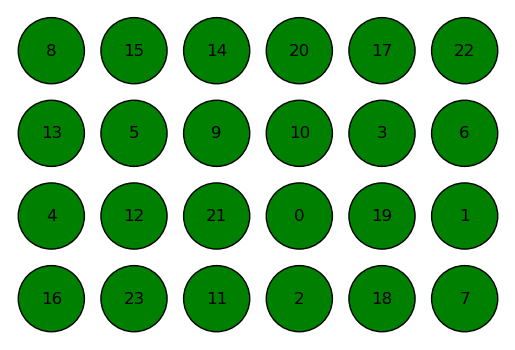

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()

# Define the grid dimensions
rows = len(best_seating)
cols = len(best_seating[0])

# Function to check if two persons have a conflict
def has_conflict(p1, p2):
    # A conflict exists if pairwise_conflicts[p1, p2] or pairwise_conflicts[p2, p1] is 1
    return pairwise_conflicts[p1, p2] == 1 or pairwise_conflicts[p2, p1] == 1

# Loop through the seating array to plot the circles and check for conflicts
for i in range(rows):
    for j in range(cols):
        person = best_seating[i, j]  # Current person in the seating

        # Check for conflicts with adjacent persons
        conflict = False
        if i > 0 and has_conflict(person, best_seating[i-1, j]):  # Check person above
            conflict = True
        if i < rows - 1 and has_conflict(person, best_seating[i+1, j]):  # Check person below
            conflict = True
        if j > 0 and has_conflict(person, best_seating[i, j-1]):  # Check person to the left
            conflict = True
        if j < cols - 1 and has_conflict(person, best_seating[i, j+1]):  # Check person to the right
            conflict = True

        # Set circle color based on conflict status
        circle_color = 'red' if conflict else 'green'
        
        # Draw the circle with the determined color
        circle = plt.Circle((j, rows - i - 1), 0.4, color=circle_color, ec='black')
        ax.add_patch(circle)
        
        # Add the person number at the center of the circle
        ax.text(j, rows - i - 1, person, color='black', ha='center', va='center', fontsize=12)

# Set the limits and aspect ratio of the plot
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_aspect('equal')

# Remove the axes for a cleaner look
ax.axis('off')

# Display the plot
plt.show()
